# Chapter 2 Exercise 4 (Cohen's D)

In [2]:
import os
print(os.getcwd())
#os.chdir('ThinkStats2/code')

/Users/Seth/Documents/Data Science/Metis/dsp/ThinkStats2/code


In [4]:
import seaborn as sns
import math
import pandas
import numpy as np
import random
import matplotlib.pyplot as plt
import thinkstats2
import probability
import thinkplot
import nsfg
import chap01soln
from scipy import stats
import statsmodels
%matplotlib inline

Exercise 2.4 Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [5]:
preg = nsfg.ReadFemPreg()

In [6]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [7]:
first_wgt = preg[preg['birthord']==1.0]['totalwgt_lb']
other_wgt = preg[preg['birthord']!=1.0]['totalwgt_lb']
first_wgt = first_wgt[first_wgt.notnull()]
other_wgt = other_wgt[other_wgt.notnull()]

In [8]:
first_len = preg[preg['birthord']==1.0]['prglngth']
other_len = preg[preg['birthord']!=1.0]['prglngth']
first_len  = first_len[first_len.notnull()]
other_len = other_len[other_len.notnull()]

In [9]:
print(first_wgt.mean(),other_wgt.mean(),sep='\t')
print(first_wgt.std(),other_wgt.std(),sep='\t')
print()
print(first_len.mean(),other_len.mean(),sep='\t')
print(first_len.std(),other_len.std(),sep='\t')

7.201094430437772	7.325855614973262
1.4205728777207374	1.3941954762143138

38.60095173351461	25.17124183006536
2.7919014146686947	14.825479314114457


In [10]:
print("Effective weight difference (first minus others): %s" % CohenEffectSize(first_wgt,other_wgt),
     "Effective length difference (first minus others): %s" % CohenEffectSize(first_len,other_len),sep = '\n')

Effective weight difference (first minus others): -0.08867236333202932
Effective length difference (first minus others): 1.0930083433621403


## Results

Effective weight difference (first minus others): -0.08867236333202932
Effective length difference (first minus others): 1.0930083433621403
 
The first born babies were statistally lighter than the other babies, but only by .09 standard deviations or 
about a twentieth of a pound difference.

The pregnacy duration differs tremendusly where first born babies tend to have longer pregnacies by 1.1 
standard deviations or about 14 weeks. 

Comparing first and "other" born deviations independantly, there it can been seen that first born babies have a 
more predictable pregnacy duration while "other" born on average are shorter, but are generally more unpredicable. 

# Chapter 3 Exercise 1 (actual vs. biased)

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the ```NSFG``` respondent variable ```NUMKDHH``` to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the chidren and asked them how many children under 18 (including themselves) are in their household.
Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb.

In [11]:
resp = chap01soln.ReadFemResp()
numkdhh = resp['numkdhh']

In [12]:
def pmf(series):
    prob_series = series.value_counts().sort_index() / len(series)
    d = {x : freq for x, freq in prob_series.iteritems()}
    return d
def biaspmf(series):
    d = {}
    prob_series = (series.value_counts().sort_index() / len(series))
    prob_series = prob_series.mul(prob_series.index)
    d = {x : freq for x, freq in prob_series.iteritems()}
    return d

In [13]:
unbias = pmf(numkdhh)
bias = biaspmf(numkdhh)
unique_values = len(bias)
bias_values = list(bias.values())
bias_values.append(0)
shape = list(range(0,7))

The unbias mean is 1.02420515504 and the bias mean is 2.46186052597


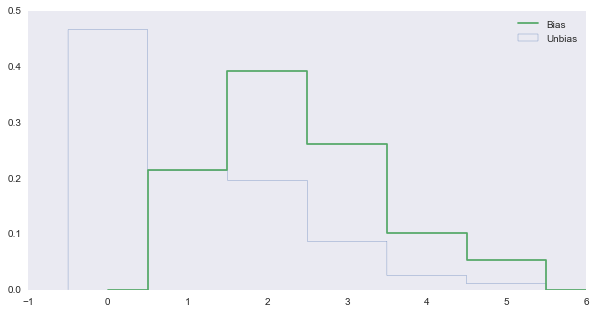

In [18]:
sns.set_style("dark")
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.hist(numkdhh, bins=unique_values, range=[0,unique_values], normed=True, histtype='step', align='left',label='Unbias')
ax.step(shape,bias_values,where='mid',label='Bias')
bias_mean = sum([k*v for k,v in bias.items()])
unbias_mean = sum([k*v for k,v in unbias.items()])
print('The unbias mean is %s and the bias mean is %s' % (unbias_mean,bias_mean))
plt.legend()
#plt.savefig('../../img/bias_vs_unbias.png')

### By means of ThinkStats2 built in functions

In [20]:
pmf = thinkstats2.Pmf(numkdhh, label='Unbiased')
pmf_biased = probability.BiasPmf(pmf, label='Biased')

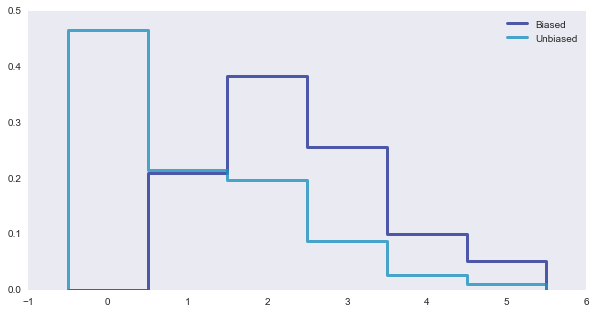

In [21]:
thinkplot.Figure(figsize=[10,5])
thinkplot.preplot(2)
thinkplot.Pmfs([pmf_biased,pmf])
#thinkplot.save('../../img/bias_vs_unbias_thinkplot')
thinkplot.show()

In [22]:
print ("The mean of the Unbiased PMF is: %s" % pmf.Mean(),"The mean of the Biased PMF is: %s" % pmf_biased.Mean(),sep='\n')

The mean of the Unbiased PMF is: 1.02420515504
The mean of the Biased PMF is: 2.40367910066


# Chapter 4 Exercise 2 (random distribution)

Exercise 4.2 The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [23]:
rand = [random.random() for i in range(1000)]

/Users/Seth/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


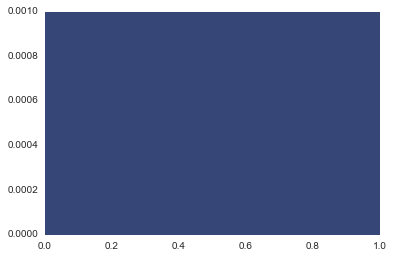

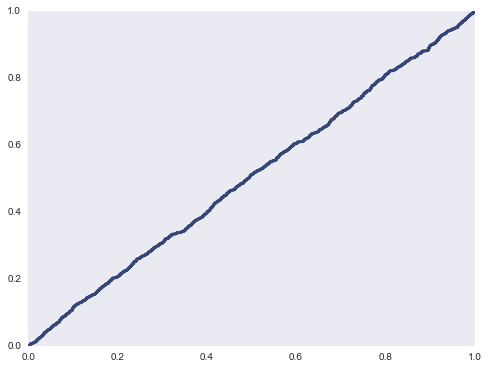

In [24]:
pmf = thinkstats2.Pmf(rand)
thinkplot.Pmf(pmf)
#thinkplot.save('../../img/pmf_random_distribution')
thinkplot.show()

cdf = thinkstats2.Cdf(rand)
thinkplot.Cdf(cdf)
#thinkplot.save('../../img/cdf_random_distribution')

thinkplot.show()

## Think Stats Chapter 5 Exercise 1

For the following exercises, you can start with chap05ex.ipynb. My solu- tion is in chap05soln.ipynb.
Exercise 5.1 In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163 cm and σ = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

In [25]:
mew = 178
sigma = 7.7
x1 = (5+10/12)*30.48
x2 = (6+1/12)*30.48
dist = stats.norm(loc = mew,scale = sigma)

In [26]:
print("%s percent of the male population is in the range to be in the blue man group." % ((dist.cdf(x2)-dist.cdf(x1))*100))

34.2746837631 percent of the male population is in the range to be in the blue man group.


# Bayesian (Elvis Presley twin)

Bayes' Theorem is an important tool in understanding what we really know, given evidence of other information we have, in a quantitative way. It helps incorporate conditional probabilities into our conclusions.

Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.



# $$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B \mid A) \, P(A) + P(B \mid C) \, P(C)} $$

# $$P(I \mid T) = \frac{P(T \mid I) \, P(I)}{P(T \mid I) \, P(I) + P(T \mid F) \, P(F)} $$


$P(T)$ and $P(I)$ and $P(F)$ are the probabilities of observing TWIN, IDENTICAL, and FRATERNAL without regard to each other.

$P(T | I)$, a conditional probability, is the probability of observing event TWIN given that IDENTICAL is true.

$P(I | T)$ is the probability of observing event IDENTICAL given that TWIN is true.

## Since,

$P(T) = P(I) + P(F)$ assuming FRATERNAL and IDENTICAL twins are mutually exclusive and are the only twin types

$P(T \mid I) = P(T \mid F) = 1$

$P(F \mid T) = 1 - P(I \mid T)$

In [28]:
prob_ftwin = 1/125
prob_itwin = 1/300
prob_twin = prob_ftwin + prob_itwin

## Thus,

### $P(I \mid T) = \frac{ \, P(I)}{ \, P(I) +  \, P(F)} $

### $or$

### $P(I \mid T) = \frac{P(I)}  {P(T)}$

Probability of Evis' twin is identical is $29.4\%$

## Probability by means of simulation

In [29]:
nsim = 10000000
is_nottwin = 1-(prob_ftwin+prob_itwin)
twin_array = stats.binom.random_state.choice(['n','f','i'],nsim, p=[is_nottwin, prob_ftwin, prob_itwin])
twin_list = twin_array.tolist()
twin_list.count('i')/(twin_list.count('i')+twin_list.count('f'))

0.29066650095873875

# Bayesian & Frequentist Comparison

How do frequentist and Bayesian statistics compare?

Bayesian inference has a "fixed" data set where the model can be optimized by adding more samples. Thus, Bayesian inference requries prior knowledge or a prior hypothesis. Frequentists fixes parameters and relies on how close the samples compare to each other, or frequency, to draw an inference.

# Optional Exercises

The following exercises are optional, but we highly encourage you to complete them if you have the time.

# Chapter 7 Exercise 1 (correlation of weight vs. age)

In this exercise, you will compute the effect size of correlation. Correlation measures the relationship of two variables, and data science is about exploring relationships in data.


Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. 

Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [30]:
bwma = nsfg.ReadFemPreg()
bwma = bwma[['agepreg','totalwgt_lb']]
bwma.dropna(axis=0,how='any',inplace=True)
agepreg_series, birth_wgt_series = bwma['agepreg'], bwma['totalwgt_lb']

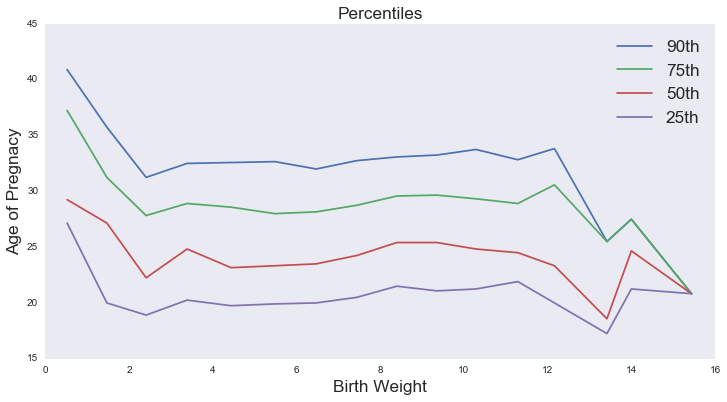

In [37]:
bwma = bwma.dropna(subset=['agepreg','totalwgt_lb'])
bins = np.arange(0, 17, 1)
indices = np.digitize(bwma['totalwgt_lb'], bins)
groups = bwma.groupby(indices)
cdfs = [thinkstats2.Cdf(group['agepreg']) for i, group in groups]
weights = [group['totalwgt_lb'].mean() for i, group in groups]
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
ax.set_xlabel("Birth Weight", fontsize= 'xx-large')
ax.set_ylabel("Age of Pregnacy",fontsize= 'xx-large')
ax.set_title('Percentiles',fontsize= 'xx-large')
for percent in [90,75, 50, 25]:
    ages = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    ax.plot(weights, ages, label=label)
plt.legend(fontsize= 'xx-large')
plt.show()
#plt.savefig('../../img/percentiles.png')

Spearman correlation: 0.0946100410966
Pearson correlation: 0.0688339703541


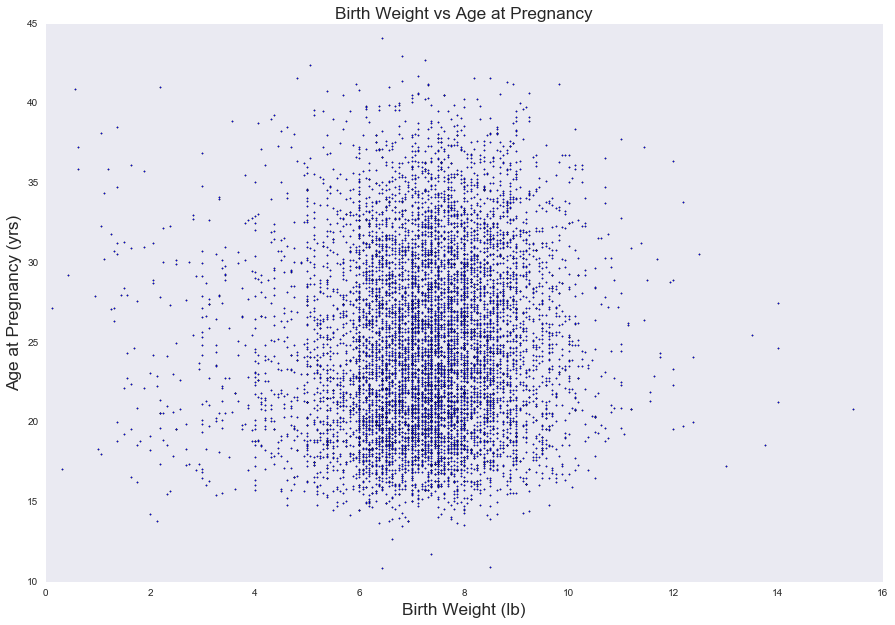

In [39]:
pearson = birth_wgt_series.corr(other = agepreg_series, method='pearson')
spearman = birth_wgt_series.corr(other = agepreg_series, method='spearman')
print('Spearman correlation: %s\nPearson correlation: %s' % (spearman,pearson))
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_xlim(0,16)
ax.set_ylim(10,45)
ax.set_title('Birth Weight vs Age at Pregnancy', fontsize = 'xx-large')
ax.set_xlabel('Birth Weight (lb)', fontsize = 'xx-large')
ax.set_ylabel('Age at Pregnancy (yrs)', fontsize = 'xx-large')
ax.scatter(birth_wgt_series,agepreg_series,s=2)
plt.show()
#plt.savefig('../../img/scatter.png')

### The coorilation metrics show that there is a slight coorilation between the two data sets, though they are very small.

# Chapter 8 Exercise 2 (sampling distribution)

In the theoretical world, all data related to an experiment or a scientific problem would be available. In the real world, some subset of that data is available. This exercise asks you to take samples from an exponential distribution and examine how the standard error and confidence intervals vary with the sample size.

Suppose you draw a sample with size n = 10 from an exponential distribution with l = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.
Repeat the experiment with a few different values of n and make a plot of standard error versus n.

In [33]:
def estimate(n=7,m=1000):
    mu = 0
    sigma = 1
    means = []
    medians = []
    for i in range(m):
        xs = [random.gauss(mu,sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    print('rmse xbar',RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)
def estimate2(n=7,m=1000):
    mu = 0
    sigma = 1
    
    estimates1 = []
    estimates2 = []
    for i in range(m):
        xs = [random.gauss(mu,sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
        
    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error biased', MeanError(estimates2, sigma**2))

def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)
"""
def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
        
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    stderr = RMSE(means,mu)
"""
def estimate3(n=7, m=1000):
    lam = 2
    
    means = []
    medians = []
    for i in range(m):
        xs = np.random.exponential(1.0/ lam, n)
        L = 1/np.mean(xs)
        Lm = math.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
    
    return {'rmse L': RMSE(means, lam), 'rmse Lm' : RMSE(medians,lam), 
            'mean error L': MeanError(means, lam),'mean error Lm': MeanError(medians,lam)}


def SimulateSample(lam=2, n=10, m=1000):

    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for j in range(m):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Save(root='estimation2',
                   xlabel='estimate',
                   ylabel='CDF',
                   title='Sampling distribution')

    return stderr

In [34]:
lam = 2
nsim = 1000
n = 10 #sample size
m = 1000 #sample median

est = estimate3(10,1000)

for n in [10, 100, 1000]:
    stderr = SimulateSample(n=n)
    print(n, stderr)

standard error 0.7745620825806073
confidence interval (1.2872781716041573, 3.6623391956066582)
Writing estimation2.pdf
Writing estimation2.eps


/Users/Seth/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


10 0.7745620825806073
standard error 0.2029597127008418
confidence interval (1.6985343425175037, 2.3896018816828435)
Writing estimation2.pdf
Writing estimation2.eps
100 0.2029597127008418
standard error 0.06483818082589136
confidence interval (1.8929374404189545, 2.1079864064246148)
Writing estimation2.pdf
Writing estimation2.eps
1000 0.06483818082589136


# Chapter 6 Exercise 1 (skewness of household income)

Exercise 6.1 The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.

The Current Population Survey (CPS) is a joint effort of the Bureau of La- bor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from.

I downloaded, which is an Excel spreadsheet with information about household income, and con- verted it to a CSV file you will find in the repository for this book. You will also find,which reads this file and transforms the
data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under \$5000.” The highest range includes respondents who made “$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the val- ues are distributed in each range.

provides                                   , which shows one way to model this data. It takes a DataFrame with a col- umn,             , that contains the upper bound of each range, and         , which contains the number of respondents in each frame.
It also takes                   , which is an assumed upper bound on the highest range, expressed in           dollars. The default value,                           repre- sents the assumption that the largest income among the respondents is 106, or one million dollars.
generates a pseudo-sample; that is, a sample of house- hold incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced
on a log10 scale.

Compute the median, mean, skewness and Pearson’s skewness of the re- sulting sample. What fraction of households reports a taxable income below the mean? How do the results depend on the assumed upper bound?

# Chapter 8 Exercise 3 (scoring)

# Chapter 9 Exercise 2 (resampling)